In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
os.chdir(r"C:\Users\mayan\Desktop\Mayank's folder\Python Data Analysis")
df = pd.read_csv('Bakery.csv')

In [4]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [5]:
df.tail()

,TransactionNo,Items,DateTime,Daypart,DayType
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
df.columns = ['TransactionNo', 'Items', 'DateTime', 'DayPart', 'DayType']

In [8]:
df.Items.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [9]:
df.Items.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [10]:
df.DayPart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [11]:
df.DayType.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [12]:
df.DateTime = pd.to_datetime(df.DateTime)

In [13]:
df.head()

,TransactionNo,Items,DateTime,DayPart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [116]:
df_new = pd.DataFrame(df.groupby(['Items'])['Items'].count().sort_values(ascending=False))

In [118]:
df_new.head(10)

,Items
Items,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Sandwich,771
Medialuna,616
Hot chocolate,590
Cookies,540


## So, these are the top 10 selling products in the bakery and there share in percentage among all the products

<BarContainer object of 10 artists>

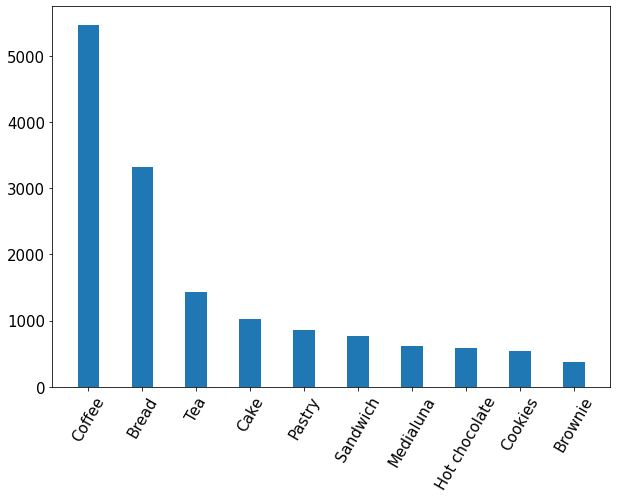

In [19]:
fig = plt.figure(figsize=(10,7))
plt.xticks(fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.bar(list(df_new['Items'].head(10)), list(df_new['Items_value'].head(10)), width = 0.4)

In [121]:
total = df['Items'].value_counts().sum() 

In [126]:
df_new['Items_value'].apply(lambda x:(x/total)*100).head(10)

0    26.678695
1    16.213976
2     6.997611
3     4.998293
4     4.174184
5     3.759692
6     3.003852
7     2.877066
8     2.633247
9     1.848149
Name: Items_value, dtype: float64

In [20]:
df.head()

,TransactionNo,Items,DateTime,DayPart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


### Let's see the peak ours in this shop

In [21]:
peak_hours = pd.DataFrame(df.groupby('DayPart')['DayPart'].count())
peak_hours.rename(columns={'DayPart':'values'},inplace=True)
peak_hours.reset_index(inplace=True)

<BarContainer object of 4 artists>

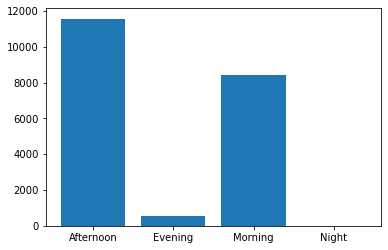

In [22]:
plt.bar(list(peak_hours['DayPart']),list(peak_hours['values']))

 ### Obviously, crowd is more likly to be on week days  

In [23]:
df.groupby('DayType')['DayType'].count()

DayType
Weekday    12807
Weekend     7700
Name: DayType, dtype: int64

In [24]:
sales_by_month = df.groupby(df.DateTime.dt.month_name())['TransactionNo'].count()
sales_by_month = sales_by_month.reset_index()

In [25]:
sales_by_month.rename(columns={'TransactionNo':'TransactionCount'},inplace = True)

In [26]:
sales_by_month.head()

,DateTime,TransactionCount
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027


### looks like march is the most active month and then november is second
#### March has the highest number of transactions 

<BarContainer object of 12 artists>

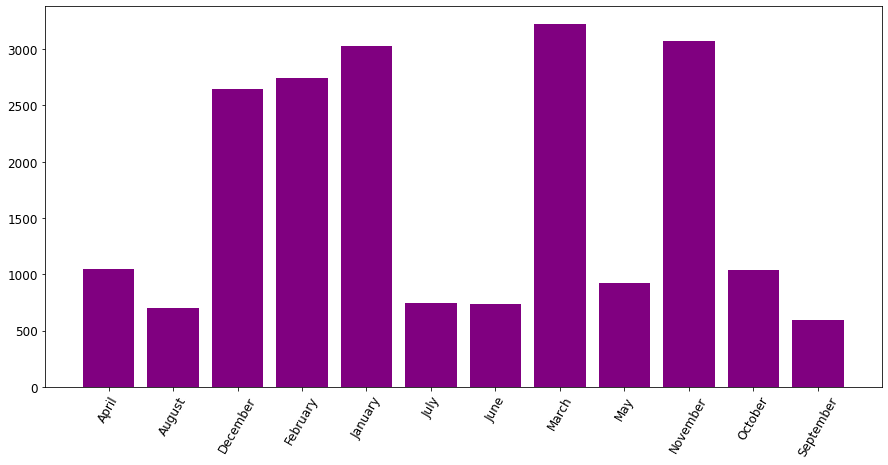

In [27]:
plt.figure(figsize=(15,7))
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.bar(list(sales_by_month['DateTime']),list(sales_by_month['TransactionCount']),color='Purple')

## Now Let's see what is the peak time (hours) during a day

In [41]:
peak_time = pd.DataFrame(df.groupby(df.DateTime.dt.hour)['DateTime'].count().sort_values(ascending=False))

In [49]:
peak_time.rename(columns={'DateTime':'TotalCount'},inplace=True)

In [50]:
peak_time.reset_index(inplace=True)

In [51]:
peak_time

,DateTime,TotalCount
0,11,3102
1,12,2854
2,10,2666
3,14,2640
4,13,2617
5,15,2115
6,9,1966
7,16,1343
8,8,645
9,17,368


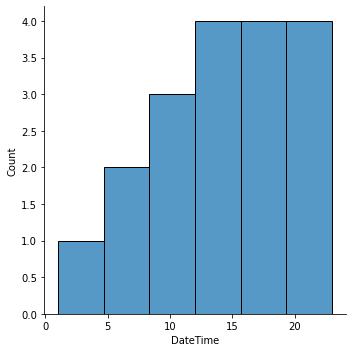

In [79]:
# plt.yticks(peak_time.DateTime,fontsize=12)
sns.displot(peak_time.DateTime,label=peak_time.TotalCount)
plt.show()

<BarContainer object of 18 artists>

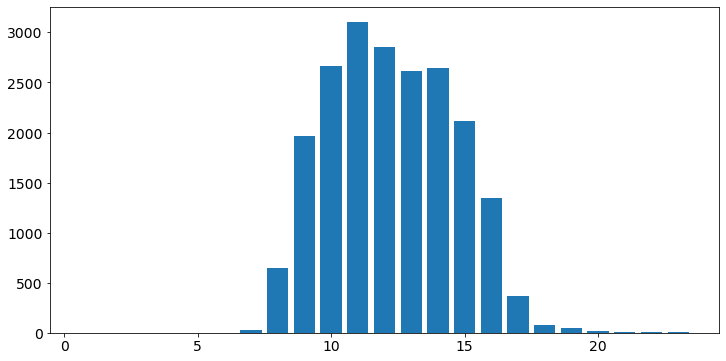

In [89]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(list(peak_time.DateTime),list(peak_time.TotalCount))

In [128]:
df.head()

,TransactionNo,Items,DateTime,DayPart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
